<a href="https://colab.research.google.com/github/asmitabhangare/Uber_Data_Analysis/blob/main/Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Load the datasets

df_apr14=pd.read_csv("uber-raw-data-apr14.csv")
df_may14=pd.read_csv("uber-raw-data-may14.csv")
df_jun14=pd.read_csv("uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("uber-raw-data-sep14.csv")

In [ ]:
#Merge the dataframes into one
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
# Renaming the Date/Time Column
df = df.rename(columns={'Date/Time': 'Date_time'})

In [ ]:
df['Date_time'] = pd.to_datetime(df['Date_time'])

In [ ]:
df.head()

,Date_time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 138.4+ MB


In [ ]:
df['Month'] = df['Date_time'].dt.month_name()
df['Day'] = df['Date_time'].dt.day_name()
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [ ]:
# Categorize into weekday or weekend
df['Weekday_Weekend'] = df['Day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [ ]:
df.head()

,Date_time,Lat,Lon,Base,Month,Day,Hour,Minute,Weekday_Weekend
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,0,11,Weekday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,0,17,Weekday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,0,21,Weekday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,0,28,Weekday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,0,33,Weekday


In [ ]:
df.columns

Index(['Date_time', 'Lat', 'Lon', 'Base', 'Month', 'Day', 'Hour', 'Minute',
       'Weekday_Weekend'],
      dtype='object')

# Peak Hours for Uber Rides

In [ ]:
df_hours = df.groupby('Hour').size().reset_index(name='Number_of_trips')
df_hours.head()

,Hour,Number_of_trips
0,0,103836
1,1,67227
2,2,45865
3,3,48287
4,4,55230


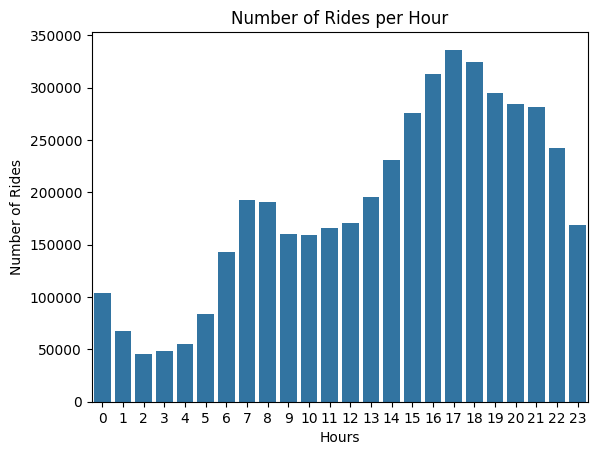

In [ ]:
sns.countplot(x='Hour', data=df)
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Hour')
plt.show()

In [ ]:
#The highest number of trips by hour
max_Number_of_trips_hour = max(df_hours['Number_of_trips'])
max_hour = df_hours[df_hours['Number_of_trips'] == max_Number_of_trips_hour].index[0]

print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'.format(max_Number_of_trips_hour, max_hour))

The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


We observe that the number of trips are higher around 16:00 and 18:00, with a spike at 17:00. It matches the end of a working day in the United States (16:30), the time when the workers go home.

We can say that the majority of Uber's clients are workers.

# Number of Rides by Day of the Week

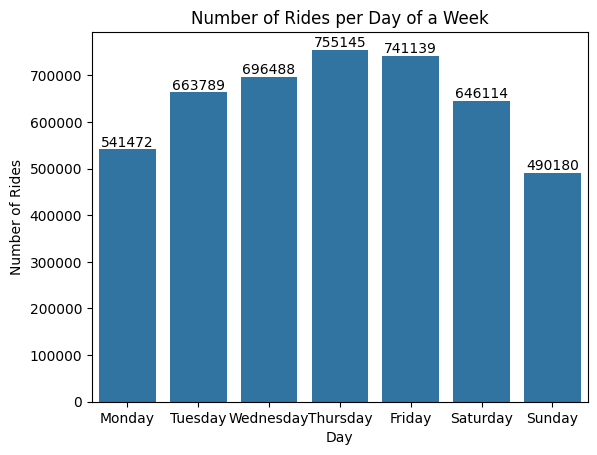

In [ ]:
ax = sns.countplot(x='Day', data=df,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day')
plt.ylabel('Number of Rides')
ax = plt.bar_label(ax.containers[0])
plt.title('Number of Rides per Day of a Week')
plt.show()

We observe that Thursday and friday has more number of trips as compare to Sunday


# Ride Frequency by Month

In [ ]:
df_months = df.groupby('Month').size().reset_index(name='Number_of_trips')
df_months

,Month,Number_of_trips
0,April,564516
1,August,829275
2,July,796121
3,June,663844
4,May,652435
5,September,1028136


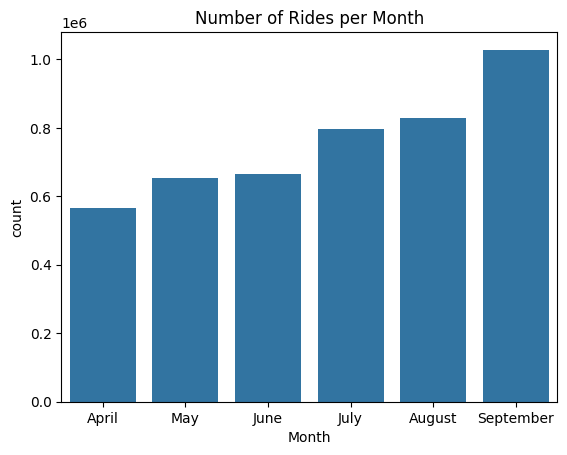

In [ ]:
ax = sns.countplot(x='Month', data=df)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
ax = plt.bar_label(ax.containers[0])
plt.show()

We observe that the number of trips increases each month, with a peak increase between August and September.

In [ ]:
number_of_trips_aug = df_months.loc[df_months['Month'] == 'August'].values[0][1]
number_of_trips_sep =  df_months.loc[df_months['Month'] == 'September'].values[0][1]

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))

The ratio of the increase from August to September is 24 %.


# Frequency of Rides on Weekdays and weekends

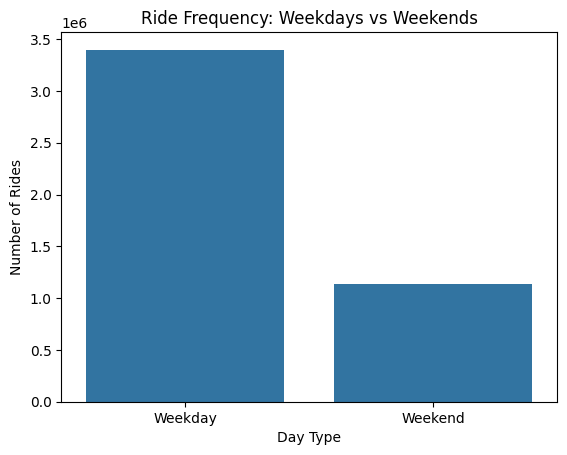

In [ ]:
sns.countplot(x='Weekday_Weekend', data=df)
plt.title('Ride Frequency: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Rides')
plt.show()

We observe that the number of rides on weekdays is higher than on weekends.

# Ride Frequencies by Base

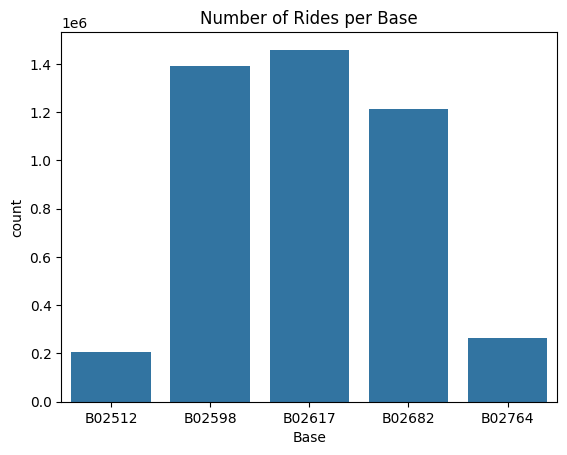

In [ ]:
sns.countplot(x='Base', data=df)
plt.title('Number of Rides per Base')
plt.show()

# Most Common Pickup Locations

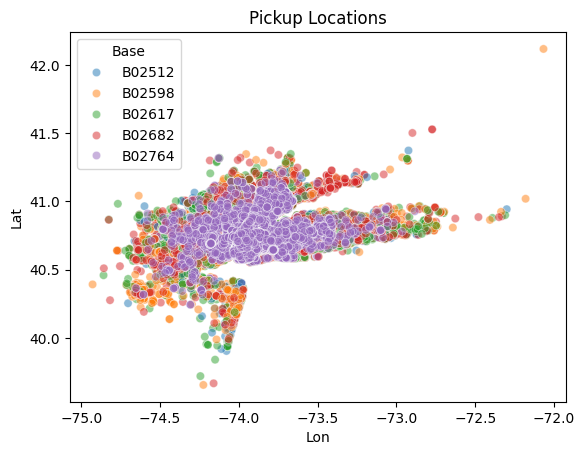

In [ ]:
sns.scatterplot(x='Lon', y='Lat', hue='Base', data=df, alpha=0.5)
plt.title('Pickup Locations')
plt.show()

# Heatmap of Rides by Hour and Day

In [ ]:
pivot = df.pivot_table(index='Hour', columns='Day', values='Base', aggfunc='count')
pivot

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,13716,6436,27633,32877,9293,6237,7644
1,8163,3737,19189,23015,5290,3509,4324
2,5350,2938,12710,15436,3719,2571,3141
3,6930,6232,9542,10597,5637,4494,4855
4,8806,9640,6846,6374,8505,7548,7511
5,13450,15032,7084,6169,14169,14241,13794
6,23412,23746,8579,6596,27065,26872,26943
7,32061,31159,11014,8728,37038,36599,36495
8,31509,29265,14411,12128,35431,33934,33826


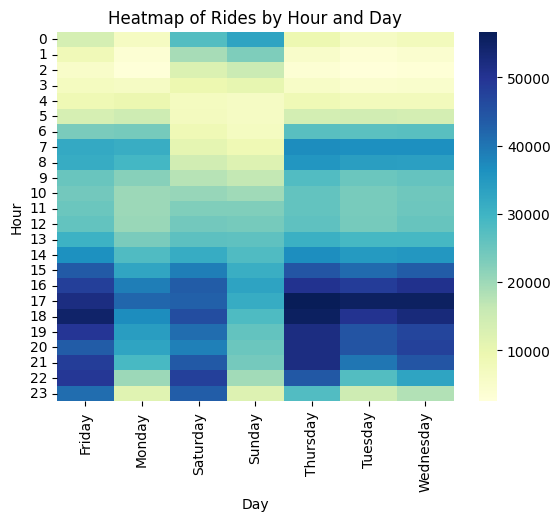

In [ ]:
sns.heatmap(pivot, cmap="YlGnBu")
plt.title('Heatmap of Rides by Hour and Day')
plt.show()

We can see that on working days (From Monday to Friday) the number of trips is higher from 16:00 to 21:00.

On Friday the number of trips remains high until 23:00 and continues on early Saturday. It corresponds to the time where people come out from work, then go out for dinner or drink before the weekend.

We can notice the same pattern on Saturday, people tend to go out at night, the number of trips remains on high until early Sunday.